<a href="https://colab.research.google.com/github/2303A54040/aiml-2024-2025/blob/main/lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
from sklearn.datasets import make_blobs
x,y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


In [6]:
x.shape

(300, 2)

In [7]:
y_true.shape

(300,)

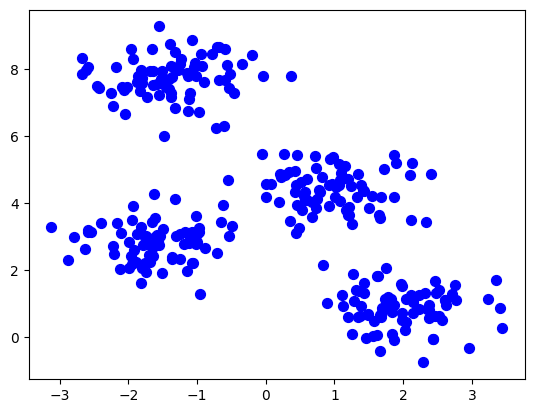

In [9]:
plt.scatter(x[:,0], x[:,1], s=50,color='blue')

In [10]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=4)

In [21]:
kmeans.fit(x)

KMeans(n_clusters=4)

In [22]:
y_kmeans_pred = kmeans.predict(x)

In [23]:
centers = kmeans.cluster_centers_
centers

array([[ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [ 0.94973532,  4.41906906],
       [-1.58438467,  2.83081263]])

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans_pred, y_true)

0.0

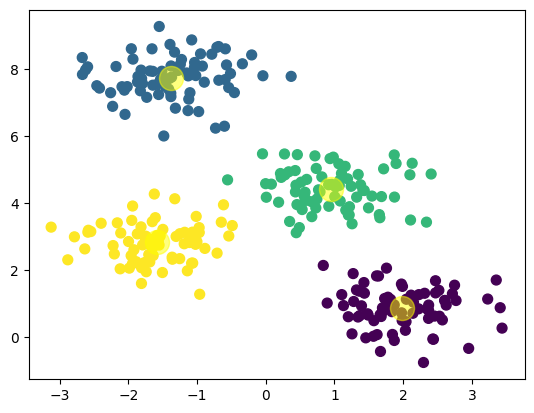

In [27]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans_pred, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.5)


In [28]:
from sklearn.metrics import pairwise_distances_argmin

In [29]:
def find_clusters(x, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]
    while True:
        labels = pairwise_distances_argmin(x, centers)
        new_centers = np.array([x[labels == i].mean(0) for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

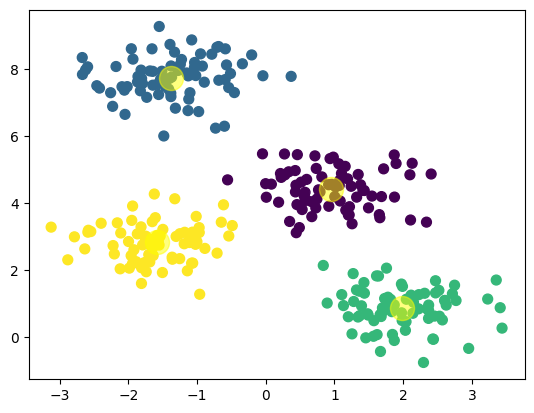

In [33]:
centers, labels = find_clusters(x, 4)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.5)

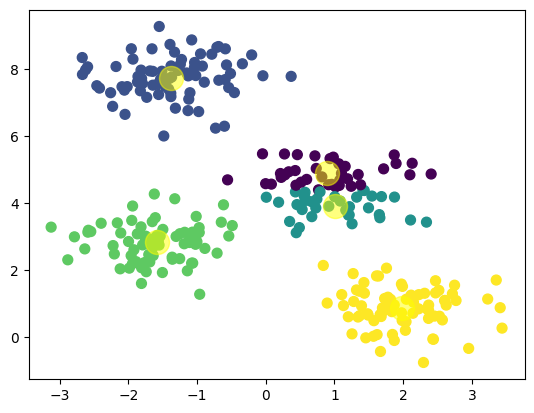

In [34]:
centers, labels = find_clusters(x, 5)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=300, alpha=0.5)

In [41]:
 from sklearn.datasets import make_moons
X,y=make_moons(200,noise=.03,random_state=0)

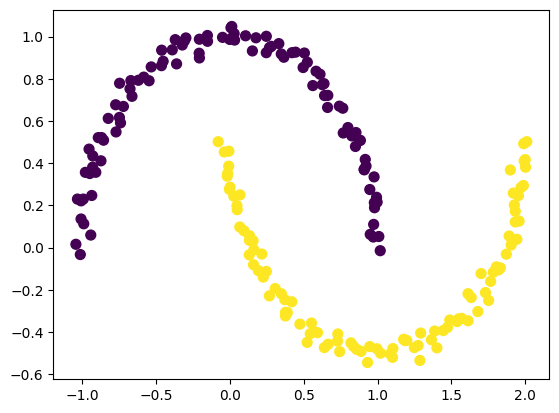

In [42]:
 plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='viridis');

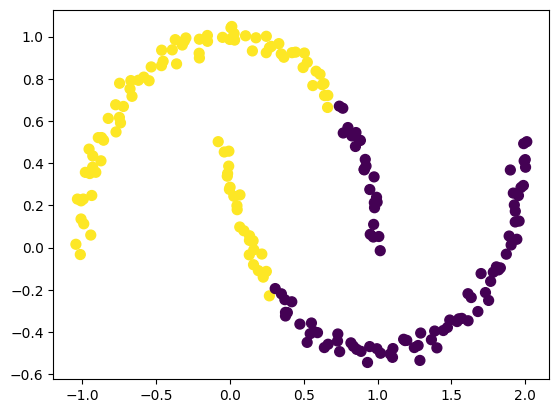

In [44]:
 plt.scatter(X[:, 0],X[:,1],c=labels,s=50,cmap='viridis')

In [45]:
from sklearn.cluster import SpectralClustering

In [46]:
mode1 = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

In [53]:
labels = mode1.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


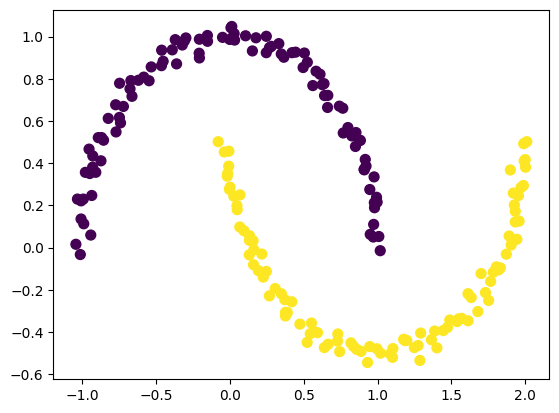

In [55]:
 plt.scatter(X[:, 0],X[:,1],c=labels,s=50,cmap='viridis')

In [65]:
from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.7, random_state=0)

In [66]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [72]:
 def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
  labels = kmeans.fit_predict(X)
  ax = ax or plt.gca()
  ax.axis('equal')
  ax.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis',edgecolor='k',zorder=2)
  centers = kmeans.cluster_centers_
  radii = [cdist(X[labels==i],[center]).max()for i,center in enumerate(centers)]
  for c,r in zip(centers,radii):
    ax.add_patch(plt.Circle(c, r, fc = '#cccccc',lw=3,alpha =0.5,zorder=1))

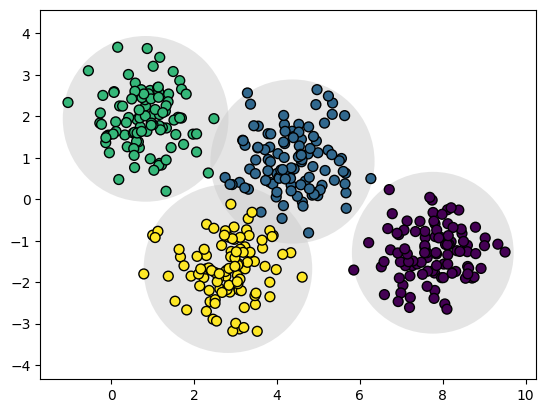

In [73]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, x)